<center><font size=8px><b>💕<font color=blue>DRUGS PRESRIPTION BASED ON REVIEWS 🔮</font></b><br><span style="color: #FF5C8A; font-size: 24px">with SENTIMENT ANALYSIS </span></h1></font>
</center>
<hr>

![](https://miro.medium.com/max/1250/1*fpKIE34xAR22c2Ti50OHqw.jpeg)

# <b>Drug Prescription Sentiment Analysis</b>
## <b>1. | Introduction</b> 👋
  * Dataset Problems 🤔 </br>
    * 👉 The <mark><b>Drug Review Dataset is taken from the UCI Machine Learning Repository</b></mark>. This Dataset <mark><b>provides patient reviews on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction</b></mark>. The data was obtained by crawling online pharmaceutical review sites.
    * 👉 The <mark><b>Drug Review Data Set is of shape (161297, 7)</b></mark> i.e. It has <mark><b>161297 Data Points or entries</b></mark> and <mark><b>7 features including the review</b></mark>. </br>
    * 👉 The <mark><b>goal of the problem</mark></b> is to <mark><b>recommend top 5 useful drugs per each different medical conditions</b></mark> based on <b><mark>reviews and calculated usefulness from rating * usefulCount * eff_score(normalized average rating)</b></mark>.
    * 👉 Let's treat this a  <mark><b>multi-class classification problem</b></mark>.
    * 👉 Choose <mark><b>the best machine Learning Models / Deep Learning Models with highest Accuracy Score and F1 Score</mark></b> to <mark><b>recommend the top 5 most useful drugs for each different Medical Conditions</b></mark>.
  * <b>Dataset Description</b> 🧾 </br>
  👉 There are <mark><b>7 variables</b></mark> in this dataset:
    * <mark><b>FEATURES</b></mark>
    <ol start="1">
      <li> <b>uniqueID |</b> An identifier for each post.</b></li>
      <li> <b>drugName |</b> The name of the drug for which review is made.</b></li>
      <li> <b>review |</b> The review made by patients for a particular medicine.</b></li>
      <li> <b>rating |</b> Ratings, given by the patients to each medicine on a scale of 10 where 10 represents the maximum efficacy.</b></li>
      <li> <b>date |</b> Date of review entry.</b></li>
      <li> <b>usefulCount |</b> The number of users who found the review useful.</b></li>
      <li> <b>condition |</b> The name of the medical condition for which the medicine is used.</br></li>
    </ol>
  * Machine Learning Modules 👨‍💻 </br>
  👉 The <b>models</b> used in this notebook:
    <ol start="1">
        <li> <b>Linear Support Vector Machine (LinearSVC)</b>,</li>
        <li> <b>Multinomiaa Naive Bayesian (MNB)</b>,</li>
        <li> <b>Light Gradient Boosting Machine (LGBM)</b>,</li>
        <li> <b>Passive Aggressive Classifier</b>,</li>
    </ol>
  * Outcome ✅</br>
    - 👉 <mark><b>Recommend the top 5 most useful drugs for each different Medical Conditions</b></mark> by <b><mark>calculated usefulness through python @interact</b></mark>.
    - 👉 <mark><b>Recommend the top 5 most useful drugs for each different Medical Conditions</b></mark> by <b><mark>the best Machine Learning models or Deep Learning models</b></mark>.
</div>

## <b>2. | File Descriptions</b> 👓
- `drugsComTrain_raw.csv`: the train dataset file.
- `drugsComTest_raw.csv`: the test dataset file.</br>


## <b>3. | Accuracy of Best Model</b> 🧪
PassiveAggressiveClassifier
- Accuracy achieved: 93.91%

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pwd
os.chdir("/content/gdrive/MyDrive/1.Knowledge/@b4.DeepLearning/c.NaturalLanguageProcessing")
!pwd
!ls "/content/gdrive/MyDrive/1.Knowledge/@b4.DeepLearning/c.NaturalLanguageProcessing"

/content
/content/gdrive/MyDrive/1.Knowledge/@b4.DeepLearning/c.NaturalLanguageProcessing
 @a.Sentiment_Analysis.ipynb
 data
 images
 reference
'@.Sentiment_Analysis_(DrugPrescription)_BidirectionalLSTM_BERT.ipynb'
'@.Sentiment_Analysis_(DrugPrescription).ipynb'


# <b>Importing the Libraries</b>

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install plot-keras-history

In [ ]:
import re, string, datetime, nltk, spacy, unicodedata, collections, multiprocessing
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from collections import defaultdict

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as py

# SkLearn & ImbalancedLearn Libraries
import sklearn, imblearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# NLTK, Spacy & Gensim Libraries
import nltk, spacy
# nltk.download("all")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import Span
from spacy.symbols import ORTH
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
nlp_no_ner = spacy.load("en_core_web_sm", exclude=["ner"])
ner_lst = nlp.pipe_labels['ner']
import gensim
import gensim.downloader as api

# Image
from PIL import Image

# For calculating Polarity and Subjectivity
from textblob import TextBlob

# Wordscloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Ipy widgets
import ipywidgets
from ipywidgets import interact

# Setting display properties
plt.rcParams['figure.figsize']=(15, 5)
plt.style.use('fivethirtyeight')
pd.set_option("display.max_colwidth", 9999)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
os.getcwd()

'/content/gdrive/MyDrive/1.Knowledge/@b4.DeepLearning/c.NaturalLanguageProcessing'

# <b>Initialize Variables</b>

In [ ]:
# Define the number of processes and batch size
num_processes = 4
batch_size = 1000

# <b>Set Seed for Repeatablilty and Reproducibility, RnR</b>

In [ ]:
seed = 42

# <b>Reading the Data</b>

In [ ]:
# Reading the Dataset
train_df = pd.read_csv('./data/drugsComTrain_raw.csv')
test_df = pd.read_csv('./data/drugsComTest_raw.csv')
# drugs_df = train_df.copy()
drugs_df = pd.concat([train_df, test_df])

# Lets print the shape of the dataset
print("The Shape of the Train Dataset :", train_df.shape)
print("The Shape of the Test Dataset :", test_df.shape)
print("The Shape of the Overall Drugs Dataset :", drugs_df.shape)

The Shape of the Train Dataset : (161297, 7)
The Shape of the Test Dataset : (53766, 7)
The Shape of the Overall Drugs Dataset : (215063, 7)


> * There are <b>over 160k rows data of drugs</b> and <b>7 feature columns for train dataset</b>.
> * There are <b>over 53k rows data of drugs</b> and <b>7 feature columns for test dataset.</b>
> * There are <b>over 215k rows data of drugs</b> and <b>7 feature columns for overall drugs dataset</b>.

In [ ]:
drugs_df.reset_index(inplace=True)
drugs_df = drugs_df.drop(columns=['index'])

In [ ]:
# Lets check the head of the dataset
drugs_df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up &amp; hurt! Leg/ankles aches severe lower bowel preassure like you need to go #2 but can&#039;t! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I&#039;m 50 &amp; work out 3Xs a week. Not worth side effects!""",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant.""",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of c

# <b>User-Defined Functions</b>

* <b>Advance Stopwords Function</b>

In [ ]:
# The reviews have so many unnecassary things such as Stopwords, Punctuations, numbers etc
# First, lets create stopwords removal functions
def advance_stopwords():
  nltk_corpus_stopwords = stopwords.words('english')
  spacy_corpus_stopwords = list(STOP_WORDS)

  # User defined stopwords
  my_stopwords = ["am not", "is not", "are not", "was not", "were not", \
                  'may', 'might', 'may not', 'might not', 'will not', 'would', 'would not', 'cannot', 'could', 'could not', \
                  'has not', 'have not', 'had not', 'shall', 'shall not', 'should not', \
                  "i am", "i was", "i have", "i had", "i shall", "i should", "i can", "i could", "i do", "i did", "i must", "i might", "i see", "i know", \
                  "i am not", "i was not", "i have not", "i had not", "i shall not", "i should not", "i cannot", "i could not", "i do not", "i did not", "i must not", "i might not", \
                  "you are", "you were", "you have", "you had", "you will", "you would", "you can", "you could", "you do", "you did", "you must", "you might", "you see", "you know", \
                  "you are not", "you were not", "you have not", "you had not", "you will not", "you would not", "you cannot", "you could not", "you do not", "you did not", "you must not", "you might not", \
                  "he is", "he was", "he has", "he had", "he will", "he would", "he can", "he could", "he does", "he did", "he must", "he might", "he sees", "he knows", \
                  "he is not", "he was not", "he has not", "he had not", "he will not", "he would not", "he cannot", "he could not", "he does not", "he did not", "he must not", "he might not", \
                  "she is", "she was", "she has", "she had", "she will", "she would", "she can", "she could", "she does", "she did", "she must", "she might", "she sees", "she knows", \
                  "she is not", "she was not", "she has not", "she had not", "she will not", "she would not", "she cannot", "she could not", "she does not", "she did not", "she must not", "she might not", \
                  "we are", "we were", "we have", "we had", "we will", "we would", "we can", "we could", "we do", "we did", "we must", "we might", "we see", "we know", \
                  "we are not", "we were not", "we have not", "we had not", "we will not", "we would not", "we cannot", "we could not", "we do not", "we did not", "we must not", "we might not", \
                  "they are", "they were", "they have", "they had", "they will", "they would", "they can", "they could", "they do", "they did", "they must", "they might", "they see", "they know", \
                  "they are not", "they were not", "they have not", "they had not", "they will not", "they would not", "they cannot", "they could not", "they do not", "they did not", "they must not", "they might not", \
                  "that will", "that would", "that should", "wow", "none", "also"]

  useful_wordds_keep = ['empty', 'full', 'whole', 'enough', 'both', 'against', 'amount', \
                        'keep', 'get', 'used', 'using', 'put', 'make', 'see', 'give', 'move', \
                        'must', 'many', 'too', 'more', 'much', 'most', 'mostly', 'less', 'least', \
                        'top' ,'bottom', 'beyond', 'behind', 'without', 'off', 'out', 'over', 'never', 'no', \
                        'same', 'side', 'around', 'well', 'serious', 'up', 'down', 'above', 'below', 'under', \
                        'only', 'until', 'within', 'few', 'each', 'part', 'various']

  nltk_corpus_stopwords_complete = list(set(nltk_corpus_stopwords) - set(useful_wordds_keep))
  spacy_corpus_stopwords_complete = list(set(spacy_corpus_stopwords) - set(useful_wordds_keep))

  final_stop_words = list(set(nltk_corpus_stopwords_complete + spacy_corpus_stopwords_complete + my_stopwords))
  # final_stop_words = set(stopwords).union(set(my_stopwords).union(STOP_WORDS))
  return final_stop_words

* <b>Decontraction Function</b>

In [ ]:
# Create decontraction function
def decontract(text):
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r";m", " am", text)
    text = re.sub(r"`m", " am", text)
    text = re.sub(r",m", " am", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r";s", " is", text)
    text = re.sub(r"`s", " is", text)
    text = re.sub(r",s", " is", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r";re", " are", text)
    text = re.sub(r"`re", " are", text)
    text = re.sub(r",re", " are", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r";ll", " will", text)
    text = re.sub(r"`ll", " will", text)
    text = re.sub(r",ll", " will", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r";d", " would", text)
    text = re.sub(r"`d", " would", text)
    text = re.sub(r",d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r";ve", " have", text)
    text = re.sub(r"`ve", " have", text)
    text = re.sub(r",ve", " have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r";t", " not", text)
    text = re.sub(r"`t", " not", text)
    text = re.sub(r",t", " not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n;t", " not", text)
    text = re.sub(r"n`t", " not", text)
    text = re.sub(r"n,t", " not", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"won;t", "will not", text)
    text = re.sub(r"won`t", "will not", text)
    text = re.sub(r"won,t", "will not", text)
    text = re.sub(r"ain\'t", "am not", text)
    text = re.sub(r"ain;t", "am not", text)
    text = re.sub(r"ain`t", "am not", text)
    text = re.sub(r"ain,t", "am not", text)
    text = re.sub(r"aren\'t", "are not", text)
    text = re.sub(r"aren;t", "are not", text)
    text = re.sub(r"aren`t", "are not", text)
    text = re.sub(r"aren,t", "are not", text)
    text = re.sub(r"can\'t", "cannot", text)
    text = re.sub(r"can;t", "cannot", text)
    text = re.sub(r"can`t", "cannot", text)
    text = re.sub(r"can,t", "cannot", text)
    text = re.sub(r"can\'ve", "can have", text)
    text = re.sub(r"can;ve", "can have", text)
    text = re.sub(r"can`ve", "can have", text)
    text = re.sub(r"can,ve", "can have", text)
    text = re.sub(r"can\'t\'ve", "cannot have", text)
    text = re.sub(r"couldn\'t", "could not", text)
    text = re.sub(r"couldn;t", "could not", text)
    text = re.sub(r"couldn`t", "could not", text)
    text = re.sub(r"couldn,t", "could not", text)
    text = re.sub(r"could\'ve", "could have", text)
    text = re.sub(r"could;ve", "could have", text)
    text = re.sub(r"could`ve", "could have", text)
    text = re.sub(r"could,ve", "could have", text)
    text = re.sub(r"couldn\'t\'ve", "could not have", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"hasn;t", "has not", text)
    text = re.sub(r"hasn`t", "has not", text)
    text = re.sub(r"hasn,t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"haven;t", "have not", text)
    text = re.sub(r"haven`t", "have not", text)
    text = re.sub(r"haven,t", "have not", text)
    text = re.sub(r"hadn\'t", "had not", text)
    text = re.sub(r"hadn;t", "had not", text)
    text = re.sub(r"hadn`t", "had not", text)
    text = re.sub(r"hadn,t", "had not", text)
    text = re.sub(r"hadn\'t\'ve", "had not have", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"don;t", "do not", text)
    text = re.sub(r"don`t", "do not", text)
    text = re.sub(r"don,t", "do not", text)
    text = re.sub(r"doesn\'t", "does not", text)
    text = re.sub(r"doesn;t", "does not", text)
    text = re.sub(r"doesn`t", "does not", text)
    text = re.sub(r"doesn,t", "does not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"didn;t", "did not", text)
    text = re.sub(r"didn`t", "did not", text)
    text = re.sub(r"didn,t", "did not", text)
    text = re.sub(r"shan\'t", "shall not", text)
    text = re.sub(r"shan;t", "shall not", text)
    text = re.sub(r"shan`t", "shall not", text)
    text = re.sub(r"shan,t", "shall not", text)
    text = re.sub(r"sha\'n\'t", "shall not", text)
    text = re.sub(r"shan\'t\'ve", "shall not have", text)
    text = re.sub(r"sha\'n\'t", "shall not", text)
    text = re.sub(r"shan\'t\'ve", "shall not have", text)
    text = re.sub(r"should\'ve", "should have", text)
    text = re.sub(r"should;ve", "should have", text)
    text = re.sub(r"should`ve", "should have", text)
    text = re.sub(r"should,ve", "should have", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"shouldn;t", "should not", text)
    text = re.sub(r"shouldn`t", "should not", text)
    text = re.sub(r"shouldn,t", "should not", text)
    text = re.sub(r"shouldn\'t\'ve", "should not have", text)
    text = re.sub(r"\'cause", "because", text)
    text = re.sub(r";cause", "because", text)
    text = re.sub(r"`cause", "because", text)
    text = re.sub(r",cause", "because", text)
    text = re.sub(r"isn\'t", "is not", text)
    text = re.sub(r"isn;t", "is not", text)
    text = re.sub(r"isn`t", "is not", text)
    text = re.sub(r"isn,t", "is not", text)
    text = re.sub(r"I\'m", "I am", text)
    text = re.sub(r"I;m", "I am", text)
    text = re.sub(r"I`m", "I am", text)
    text = re.sub(r"I,m", "I am", text)
    text = re.sub(r"I\'ve", "I have", text)
    text = re.sub(r"I;ve", "I have", text)
    text = re.sub(r"I`ve", "I have", text)
    text = re.sub(r"I,ve", "I have", text)
    text = re.sub(r"I\'d", "I had", text)
    text = re.sub(r"I;d", "I had", text)
    text = re.sub(r"I`d", "I had", text)
    text = re.sub(r"I,d", "I had", text)
    text = re.sub(r"I\'d", "I would", text)
    text = re.sub(r"I;d", "I would", text)
    text = re.sub(r"I`d", "I would", text)
    text = re.sub(r"I,d", "I would", text)
    text = re.sub(r"I\'d've", "I would have", text)
    text = re.sub(r"I\'ll", "I shall", text)
    text = re.sub(r"I;ll", "I shall", text)
    text = re.sub(r"I`ll", "I shall", text)
    text = re.sub(r"I,ll", "I shall", text)
    text = re.sub(r"I\'ll", "I will", text)
    text = re.sub(r"I;ll", "I will", text)
    text = re.sub(r"I`ll", "I will", text)
    text = re.sub(r"I,ll", "I will", text)
    text = re.sub(r"I\'ll\'ve", "I shall have", text)
    text = re.sub(r"I\'ll\'ve", "I will have", text)
    text = re.sub(r"he\'s", "he is", text)
    text = re.sub(r"he;s", "he is", text)
    text = re.sub(r"he`s", "he is", text)
    text = re.sub(r"he,s", "he is", text)
    text = re.sub(r"he\'s", "he has", text)
    text = re.sub(r"he;s", "he has", text)
    text = re.sub(r"he`s", "he has", text)
    text = re.sub(r"he,s", "he has", text)
    text = re.sub(r"he\'d", "he had", text)
    text = re.sub(r"he;d", "he had", text)
    text = re.sub(r"he`d", "he had", text)
    text = re.sub(r"he,d", "he had", text)
    text = re.sub(r"he\'ll", "he shall", text)
    text = re.sub(r"he;ll", "he shall", text)
    text = re.sub(r"he`ll", "he shall", text)
    text = re.sub(r"he,ll", "he shall", text)
    text = re.sub(r"he\'ll", "he will", text)
    text = re.sub(r"he;ll", "he will", text)
    text = re.sub(r"he`ll", "he will", text)
    text = re.sub(r"he,ll", "he will", text)
    text = re.sub(r"he\'ll\'ve", "he shall have", text)
    text = re.sub(r"he\'ll\'ve", "he will have", text)
    text = re.sub(r"he\'d", "he would", text)
    text = re.sub(r"he;d", "he would", text)
    text = re.sub(r"he`d", "he would", text)
    text = re.sub(r"he,d", "he would", text)
    text = re.sub(r"he\'d've", "he would have", text)
    text = re.sub(r"she\'s", "she is", text)
    text = re.sub(r"she;s", "she is", text)
    text = re.sub(r"she`s", "she is", text)
    text = re.sub(r"she,s", "she is", text)
    text = re.sub(r"she\'s", "she has", text)
    text = re.sub(r"she;s", "she has", text)
    text = re.sub(r"she`s", "she has", text)
    text = re.sub(r"she,s", "she has", text)
    text = re.sub(r"she\'d", "she had", text)
    text = re.sub(r"she;d", "she had", text)
    text = re.sub(r"she`d", "she had", text)
    text = re.sub(r"she,d", "she had", text)
    text = re.sub(r"she\'ll", "she shall", text)
    text = re.sub(r"she;ll", "she shall", text)
    text = re.sub(r"she`ll", "she shall", text)
    text = re.sub(r"she,ll", "she shall", text)
    text = re.sub(r"she\'ll", "she will", text)
    text = re.sub(r"she;ll", "she will", text)
    text = re.sub(r"she`ll", "she will", text)
    text = re.sub(r"she,ll", "she will", text)
    text = re.sub(r"she\'ll\'ve", "she shall have", text)
    text = re.sub(r"she\'ll\'ve", "she will have", text)
    text = re.sub(r"she\'d", "she would", text)
    text = re.sub(r"she;d", "she would", text)
    text = re.sub(r"she`d", "she would", text)
    text = re.sub(r"she,d", "she would", text)
    text = re.sub(r"she\'d\'ve", "she would have", text)
    text = re.sub(r"how\'s", "how is", text)
    text = re.sub(r"how;s", "how is", text)
    text = re.sub(r"how`s", "how is", text)
    text = re.sub(r"how,s", "how is", text)
    text = re.sub(r"how\'s", "how does", text)
    text = re.sub(r"how;s", "how does", text)
    text = re.sub(r"how`s", "how does", text)
    text = re.sub(r"how,s", "how does", text)
    text = re.sub(r"how\'s", "how has", text)
    text = re.sub(r"how;s", "how has", text)
    text = re.sub(r"how`s", "how has", text)
    text = re.sub(r"how,s", "how has", text)
    text = re.sub(r"how\'ll", "how will", text)
    text = re.sub(r"how;ll", "how will", text)
    text = re.sub(r"how`ll", "how will", text)
    text = re.sub(r"how,ll", "how will", text)
    text = re.sub(r"how\'d", "how did", text)
    text = re.sub(r"how;d", "how did", text)
    text = re.sub(r"how`d", "how did", text)
    text = re.sub(r"how,d", "how did", text)
    text = re.sub(r"how\'d\'y", "how do you", text)
    text = re.sub(r"it\'s", "it is", text)
    text = re.sub(r"it;s", "it is", text)
    text = re.sub(r"it`s", "it is", text)
    text = re.sub(r"it,s", "it is", text)
    text = re.sub(r"it\'s", "it has", text)
    text = re.sub(r"it;s", "it has", text)
    text = re.sub(r"it`s", "it has", text)
    text = re.sub(r"it,s", "it has", text)
    text = re.sub(r"it\'d", "it had", text)
    text = re.sub(r"it;d", "it had", text)
    text = re.sub(r"it`d", "it had", text)
    text = re.sub(r"it,d", "it had", text)
    text = re.sub(r"it\'d", "it would", text)
    text = re.sub(r"it;d", "it would", text)
    text = re.sub(r"it`d", "it would", text)
    text = re.sub(r"it,d", "it would", text)
    text = re.sub(r"it\'d\'ve", "it would have", text)
    text = re.sub(r"it\'ll", "it shall", text)
    text = re.sub(r"it;ll", "it shall", text)
    text = re.sub(r"it`ll", "it shall", text)
    text = re.sub(r"it,ll", "it shall", text)
    text = re.sub(r"it\'ll", "it will", text)
    text = re.sub(r"it;ll", "it will", text)
    text = re.sub(r"it`ll", "it will", text)
    text = re.sub(r"it,ll", "it will", text)
    text = re.sub(r"it\'ll\'ve", "it shall have", text)
    text = re.sub(r"it\'ll\'ve", "it will have", text)
    text = re.sub(r"let\'s", "let us", text)
    text = re.sub(r"let`s", "let us", text)
    text = re.sub(r"let,s", "let us", text)
    text = re.sub(r"ma\'am", "madam", text)
    text = re.sub(r"ma;am", "madam", text)
    text = re.sub(r"ma`am", "madam", text)
    text = re.sub(r"ma,am", "madam", text)
    text = re.sub(r"mayn\'t", "may not", text)
    text = re.sub(r"mayn;t", "may not", text)
    text = re.sub(r"mayn`t", "may not", text)
    text = re.sub(r"mayn,t", "may not", text)
    text = re.sub(r"might\'ve", "might have", text)
    text = re.sub(r"might;ve", "might have", text)
    text = re.sub(r"might`ve", "might have", text)
    text = re.sub(r"might,ve", "might have", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"mightn`t", "might not", text)
    text = re.sub(r"mightn;t", "might not", text)
    text = re.sub(r"mightn,t", "might not", text)
    text = re.sub(r"mightn\'t\'ve", "might not have", text)
    text = re.sub(r"must\'ve", "must have", text)
    text = re.sub(r"must;ve", "must have", text)
    text = re.sub(r"must`ve", "must have", text)
    text = re.sub(r"must,ve", "must have", text)
    text = re.sub(r"mustn\'t", "must not", text)
    text = re.sub(r"mustn;t", "must not", text)
    text = re.sub(r"mustn`t", "must not", text)
    text = re.sub(r"mustn,t", "must not", text)
    text = re.sub(r"mustn\'t\'ve", "must not have", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"needn;t", "need not", text)
    text = re.sub(r"needn`t", "need not", text)
    text = re.sub(r"needn,t", "need not", text)
    text = re.sub(r"needn\'t\'ve", "need not have", text)
    text = re.sub(r"o\'clock", "of the clock", text)
    text = re.sub(r"o;clock", "of the clock", text)
    text = re.sub(r"o`clock", "of the clock", text)
    text = re.sub(r"o,clock", "of the clock", text)
    text = re.sub(r"oughtn\'t", "ought not", text)
    text = re.sub(r"oughtn;t", "ought not", text)
    text = re.sub(r"oughtn`t", "ought not", text)
    text = re.sub(r"oughtn,t", "ought not", text)
    text = re.sub(r"oughtn\'t\'ve", "ought not have", text)
    text = re.sub(r"so\'ve", "so have", text)
    text = re.sub(r"so;ve", "so have", text)
    text = re.sub(r"so`ve", "so have", text)
    text = re.sub(r"so,ve", "so have", text)
    text = re.sub(r"so\'s", "so is", text)
    text = re.sub(r"so;s", "so is", text)
    text = re.sub(r"so`s", "so is", text)
    text = re.sub(r"so,s", "so is", text)
    text = re.sub(r"so\'s", "so as", text)
    text = re.sub(r"so;s", "so as", text)
    text = re.sub(r"so`s", "so as", text)
    text = re.sub(r"so,s", "so as", text)
    text = re.sub(r"that\'s", "that is", text)
    text = re.sub(r"that;s", "that is", text)
    text = re.sub(r"that`s", "that is", text)
    text = re.sub(r"that,s", "that is", text)
    text = re.sub(r"that\'s", "that was", text)
    text = re.sub(r"that;s", "that was", text)
    text = re.sub(r"that`s", "that was", text)
    text = re.sub(r"that,s", "that was", text)
    text = re.sub(r"that\'d", "that would", text)
    text = re.sub(r"that;d", "that would", text)
    text = re.sub(r"that`d", "that would", text)
    text = re.sub(r"that,d", "that would", text)
    text = re.sub(r"that\'d", "that had", text)
    text = re.sub(r"that;d", "that had", text)
    text = re.sub(r"that`d", "that had", text)
    text = re.sub(r"that,d", "that had", text)
    text = re.sub(r"that\'d\'ve", "that would have", text)

    return text

* <b>Remove Spaces, Punctuations & Accented Characters Functions</b>

In [ ]:
# Create remove space from the text function
def space_removal(text):
  text = text.strip()
  text = text.split()
  text = " ".join(text)
  return text

# Create remove punctuations from the text
def punctuation_removal(messy_str):
  clean_list = [char for char in messy_str if char not in string.punctuation]
  clean_str = ''.join(clean_list)
  return clean_str

# Lets create a function to remove accented characters
### Removing Accented Characters
### * Accented characters are important elements
###   > which are used to signify emphasis on a particular word during pronunciation or understanding.
### * In some instances, the accent mark also clarifies the meaning of a word,
###   > which might be different without the accent.
## * While their use in English is largely limited
###   > but there are very good chances that you will come across accented characters/letters
###   > in a free text corpus. Words such as résumé, café, prótest, divorcé, coördinate, exposé, latté etc
def accented_chars_removal(text):
    new_text = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in text]
    return new_text

* <b>Text Preprocess Batch Data Functions</b>

In [ ]:
lemma = WordNetLemmatizer()
def preprocessing_text(text):
  final_stop_words = advance_stopwords()
  text = re.sub(r"http\S+", "http_used", text)                      # Remove all the hyperlink in my text
  text = BeautifulSoup(text, "lxml").get_text()                     # Remove all the html tags if any
  text = decontract(text)                                           # Decontract text
  text = punctuation_removal(text)                                  # Remove punctuation
  text = re.sub(r"[^a-zA-Z]+", " ", text)                           # Remove everything(Numbers, Symbols, Special Characters) except English character
  text = space_removal(text)                                        # Remove space
  text = word_tokenize(text)                                        # Tokenize using NLTK's word_tokenize
  text = [i.lower() for i in text]                                  # Make all texts to lowercase
  text = accented_chars_removal(text)                               # Remove accented characters
  text = [i for i in text if i not in final_stop_words]             # Remove the stop words
  text = [lemma.lemmatize(i) for i in text]                         # Lemmatization
  text = " ".join(text)                                             # Text string formation
  return text

def preprocess_batch(batch):
  return [preprocessing_text(text) for text in batch]

* <b>Variables Counts and Specific Number Variables Selection Function</b>

In [ ]:
def var_selection_number(df, var, selection_num=None):
  if selection_num is None:
    print(f"Total number of {var}: ", len(df[var].unique()))
  else:
    print(f"Top {selection_num} {var} selected: ", selection_num)

def plot_bar_chart(df, var, selection_num=None):
  # Analyze the variables labels
  counts_series = df[var].value_counts()
  counts_df = pd.DataFrame(counts_series)
  counts_df.reset_index(level=0, inplace=True)

  # Select top variable if specified
  if selection_num is None:
    var_selection_number(df, var)
    fig = px.bar(counts_df, x="index", y=var, orientation='v', height=500, title=f"Total Number of {var.title()}s")
  else:
    counts_df = counts_df.head(selection_num)
    var_selection_number(df, var, selection_num)
    fig = px.bar(counts_df, x="index", y=var, orientation='v', height=500, title=f"Top {selection_num} {var.title()}s")

  # Add axis labels
  fig.update_layout(
    xaxis_title=f"{var} Index",
    yaxis_title=f"{var} Total Count",
    title_x=0.5
  )

  fig.show()

* <b>Word Clouds Function</b>
  
  * <b>define a function</b> that <b>generates the word clouds of custom shapes</b>. Here, the <b>argument mask</b> is <b>used to pass on images of high definitions</b> that are <b>used in the generation of word clouds</b>.
  * The <b>images used</b> below are <b>stored in the Kaggle dataset</b> <a href=https://www.kaggle.com/datasets/aashita/masks>Masks for word clouds</a>

In [ ]:
def plot_wordcloud(text, mask=None, max_words=100, max_font_size=100, figure_size=(12.0, 8.0),
                   title=None, title_size=25, image_color=False):
  complete_stopwords = advance_stopwords()
  wordcloud = WordCloud(background_color='white', stopwords=complete_stopwords,
                        max_words=max_words, max_font_size=max_font_size,
                        random_state=seed, mask=mask)

  wordcloud.generate(text)

  plt.figure(figsize=figure_size)
  if image_color:
    image_colors = ImageColorGenerator(mask)
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.title(title, fontdict={"size": title_size, "verticalalignment": "bottom"})
  else:
    plt.imshow(wordcloud)
    plt.title(title, fontdict={"size": title_size, "verticalalignment": "bottom"})

  plt.axis('off')
  plt.tight_layout()

d = "./images/masks_wordclouds/"

* <b>Remove Named Entity Recognition, NER Batch Function</b>

In [ ]:
# Function to remove entities from a single review
def remove_entities(review):
  doc = nlp(review)
  for ent in doc.ents:
    review = review.replace(ent.text, '')
  return review

# Function to process a batch of reviews using multiprocessing
def remove_entities_batch_parallel(batch):
  processed_batch = [remove_entities(review) for review in batch]
  return processed_batch

* <b>NGrams Function</b>

In [ ]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
  token = [token for token in text.split(" ")]
  ngrams = zip(*[token[i:] for i in range(n_gram)])
  return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
  trace = go.Bar(
    y=df["word"].values[::-1],
    x=df["wordcount"].values[::-1],
    showlegend=False,
    orientation='h',
    marker=dict(
      color=color,
    ),
  )
  return trace

* <b>Rating Scale Function</b>

In [ ]:
def scale_rating(rating):
  rating -= min_rating                # shifts the entire range of ratings so that the minimum rating becomes 0.
  rating = rating/(max_rating-1)      # normalizes the rating by dividing it by the range of ratings (excluding the maximum rating).
                                          # The purpose is to bring the ratings to a scale between 0 and 1.
  rating *= 5                         # map the normalized rating to a scale of 0 to 5.
  rating = int(round(rating,0))       # rounds the scaled rating to the nearest integer.
                                          # This is commonly done to convert a continuous scale to a discrete scale.

  if(int(rating)==0 or int(rating)==1 or int(rating)==2):
      return 0
  else:
      return 1

* <b>Most Informative Feature for Class Function</b>

In [ ]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, label_encoder, n=10):
  # Check if the specified class is present in the predicted classes
  if classlabel in label_encoder.classes_:
    # Map the original class label to the encoded value
    encoded_class = label_encoder.transform([classlabel])[0]

    # Perform feature importance analysis
    labelid = list(classifier.classes_).index(encoded_class)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]
    for coef, feat in topn:
      print(classlabel, feat, coef)
  else:
    print(f"Class '{classlabel}' is not in the list of original classes.")

* <b>Text Prediction Function</b>

In [ ]:
def predict_text(lst_text, vectorizer, model):
  df_test = pd.DataFrame(lst_text, columns=['test_sent'])
  tfidf_vec = vectorizer.transform(lst_text)
  prediction = model.predict(tfidf_vec)
  df_test['prediction']=prediction
  return df_test

* <b>Top Drugs Extractor Function</b>

In [ ]:
## Function for Extracting Top drugs
def top_drugs_extractor(df, condition):
  df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending=[False, False])
  drug_lst = df_top[df_top['condition']==condition]['drugName'].head(5).tolist()
  return drug_lst

# <b>Data Exploration, Exploratory Data Analysis</b>

### <b>Summarizing the Dataset</b>

In [ ]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


> * Drugs dataset has <b>overall 215k data points.</b>
> * There are <b>missing values in 'condition' column</b>.
> * There are <b>2 numerical features ('rating' and 'usefulCount')</b> and the <b>rest are object ('drugName', 'condition', 'review' and 'date')</b>.

In [ ]:
# Lets summarize the Dataset based on rating(good,>8 or bad, <=8 drugs) and useful count(useful,>1000 or useless,<=1000 drug)
drugs_df[['rating','usefulCount']].describe()

,rating,usefulCount
count,215063.000000,215063.000000
mean,6.990008,28.001004
std,3.275554,36.346069
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


> * The <b>mean rating is around 7</b> as <b>minimum and maximum rating are 1 and 10 respectively</b>, which is <b>very good</b>.
>> * <b>25 percentile is 5</b>, <b>50 percentile is 8</b>, whereas the <b>75 percentile is 10</b>.
>> * This means <b>most of the reviews are positive</b>, which is <b>a very good sign</b>.

> * The <b>average useful count is 28</b>.
>> * The <b>maximum count is very high compared to other statistical quantities</b>.

In [ ]:
# Lets summarize Categorical data also based on drug name, condition and review
drugs_df[['drugName','condition','review']].describe(include='object')

,drugName,condition,review
count,215063,213869,215063
unique,3671,916,128478
top,Levonorgestrel,Birth Control,"""Good"""
freq,4930,38436,39


> * The <b>levonorgestrel</b> is the <b>most common drug with 4930 occurrences</b>.
> * The <b>birth control</b> is the <b>most common condition with more than 38k occurrences</b>.
> * Finally, the <b>most common review</b> is <b>good</b> with <b>39 occurrences</b>.

In [ ]:
# checking if the data contains any NULL values
drugs_df.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

> * There are <b>1194 missing values</b> for <b>'condition' column</b>.

In [ ]:
# Lets Explore Some of the Important Column in the dataset
print("Number of Unique Drugs present in the Dataset :", drugs_df['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", drugs_df['condition'].nunique())

date_min = drugs_df['date'].min()
date_max = drugs_df['date'].max()

# Convert the date strings to datetime objects
date_min_cal = datetime.datetime.strptime(date_min, '%d-%b-%y')
date_max_cal = datetime.datetime.strptime(date_max, '%d-%b-%y')

# Calculate the difference between the two dates
date_difference = date_max_cal - date_min_cal

# Calculate the total number of years, considering leap years
total_years = int(date_difference.days / 365.25)

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", date_min)
print("Ending Date :", date_max)
print(f"Here are {total_years} years of data have been collected.")

Number of Unique Drugs present in the Dataset : 3671
Number of Unique Medical Conditions present in the Dataset : 916

The Time Period of Collecting the Data
Starting Date : 1-Apr-08
Ending Date : 9-Sep-17
Here are 9 years of data have been collected.


### <b>Unveiling Hidden Patterns from the Data</b>

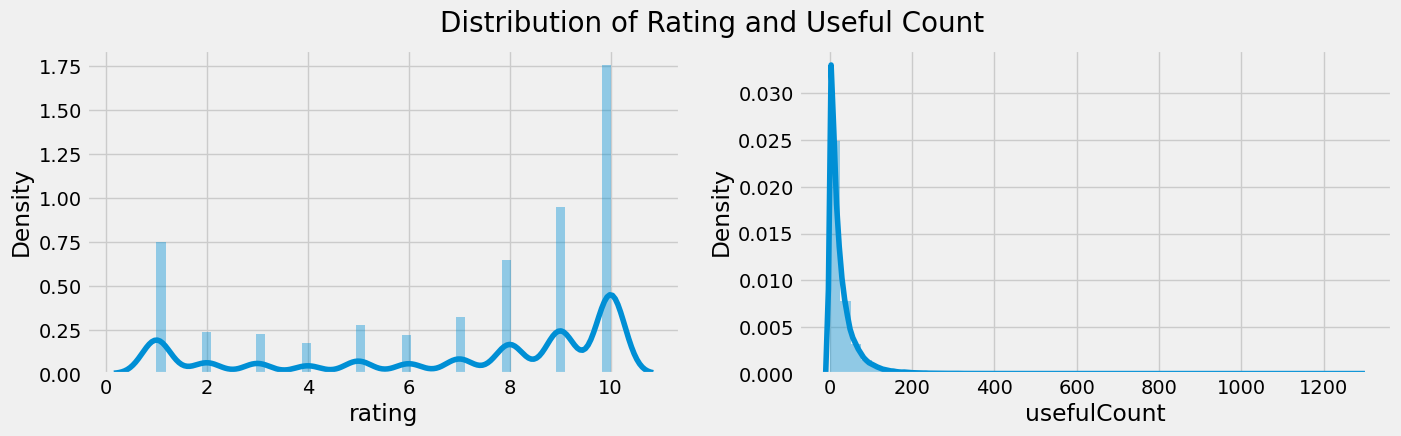

In [ ]:
# Lets check the Distribution of Rating and Useful Count using distribution plot
plt.rcParams['figure.figsize']=(15, 4)

plt.subplot(1, 2, 1)
sns.distplot(drugs_df['rating'])

plt.subplot(1, 2, 2)
sns.distplot(drugs_df['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize=20)
plt.show()

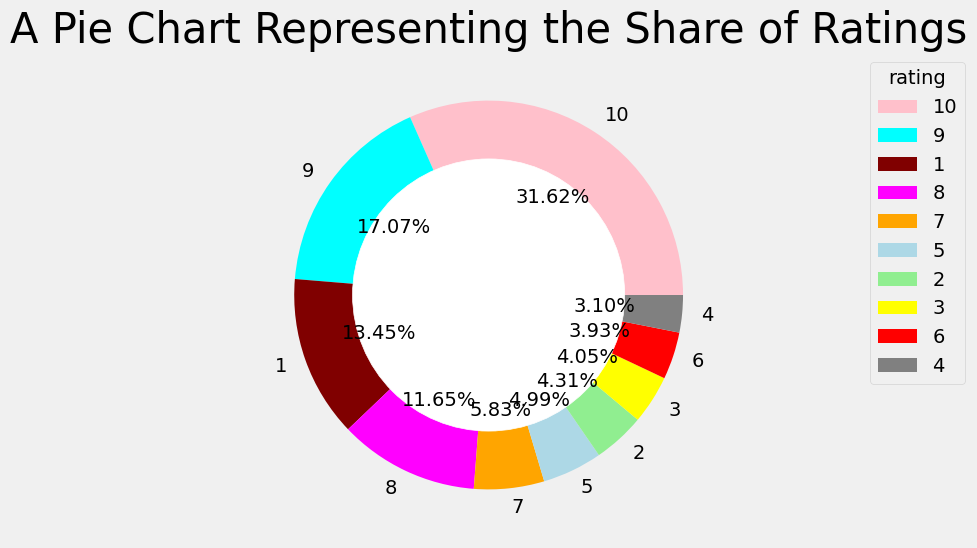

In [ ]:
my_circle = plt.Circle((0, 0), 0.7, color='white')
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow', "red", "grey"]
labels = "10", "9", "1", "8", "7", "5", "2", "3", "6", "4"

plt.rcParams['figure.figsize'] = (8, 6)
plt.pie(drugs_df["rating"].value_counts(), colors=colors, labels=labels, autopct='%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize=30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title="rating")
plt.show()

> * <b>Most of the patients</b> have given <b>ratings of 8, 9 and 10</b> , whereas the distribution for <b>lowest rating, 1 is also high</b> .
> * <b>Most of the drugs</b>  present in the data have <b>less than 200 useful count</b> .

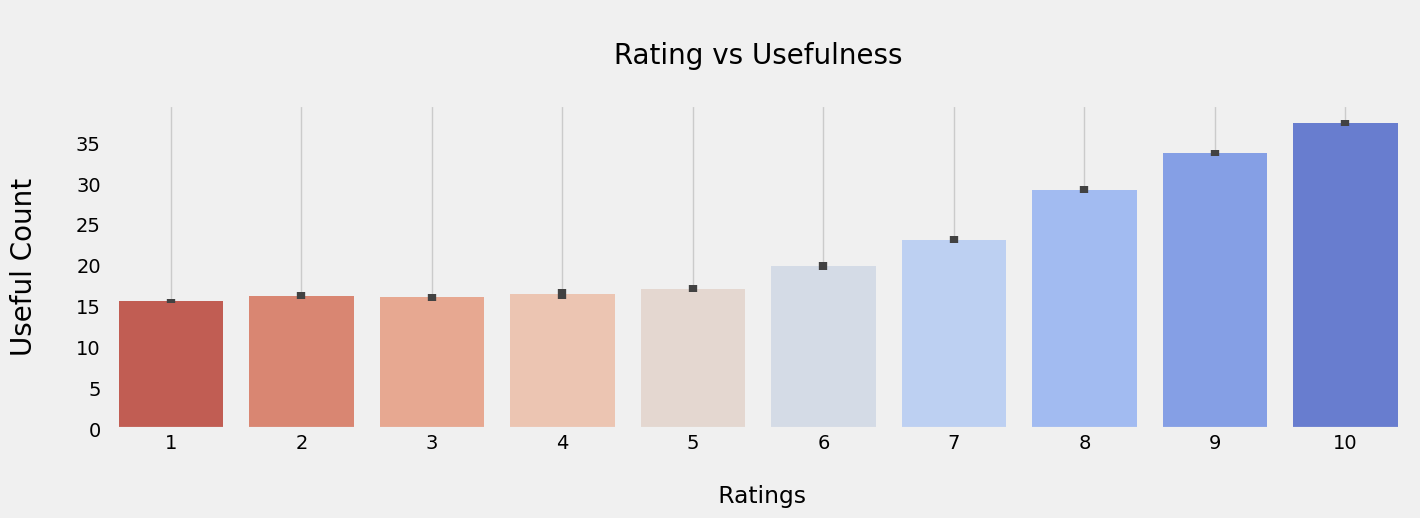

In [ ]:
# Lets check the Impact of Ratings on Usefulness using barplot
plt.rcParams['figure.figsize']=(15, 4)
sns.barplot(data=drugs_df, x=drugs_df['rating'], y=drugs_df['usefulCount'], palette='coolwarm_r')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Useful Count\n', fontsize=20)
plt.title('\n Rating vs Usefulness \n', fontsize=20)
plt.show()

> * Here is <b>a positive linear relationship</b> between <b>the rating and useful counter columns</b>.

### <b>Check Most Common Medical Conditions</b>

In [ ]:
plot_bar_chart(drugs_df, "condition")

Total number of condition:  917


In [ ]:
plot_bar_chart(drugs_df, "condition", 10)

Top 10 condition selected:  10


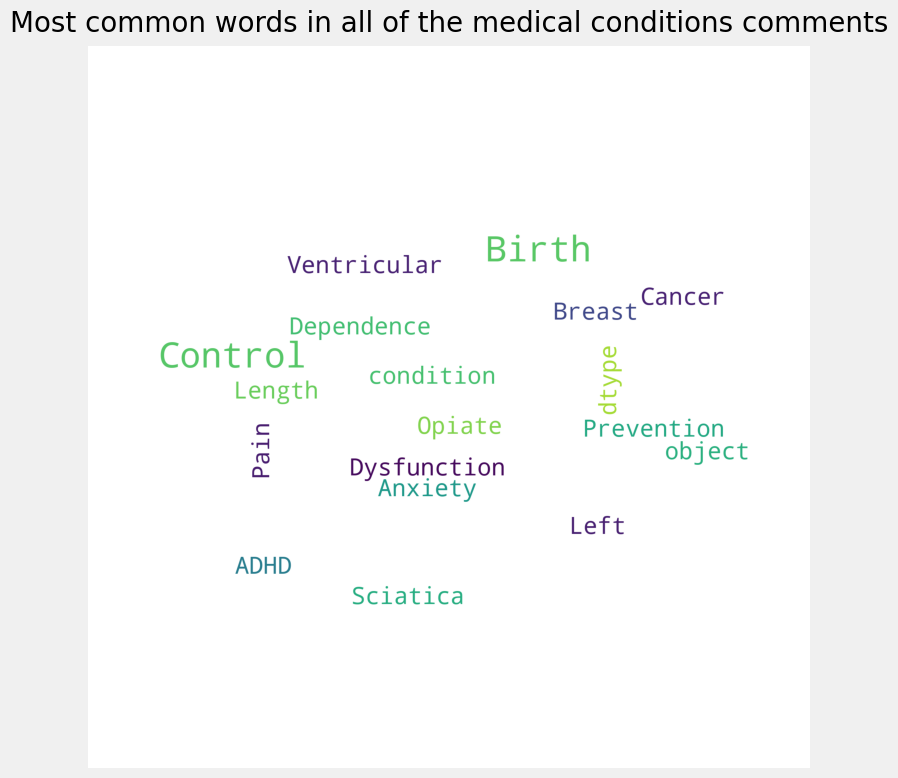

In [ ]:
comments_text = str(drugs_df["condition"])
comments_mask = np.array(Image.open(d + 'comment.png'))
plot_wordcloud(comments_text, comments_mask, max_words=20, max_font_size=100,
               title='Most common words in all of the medical conditions comments', title_size=20)

> * There are <b>some noise comment in 'condition'</b> e.g. <b>3</span> users found this comment helpful</b>.
>>  * Therefore, m<b>ay need to remove redunant non-medical conditions comments data points rows</b>.
> * From <b>top 50 Medical Conditions Barchart</b>, can be seen <b>top 10 Medical Conditions are "Birth Control", "Depression", "Pain", "Anxiety", "Acne", "Bipolar Disorder", "Insomnia", "Weight Loss", "Obesity" and "ADHD"</b>.

### <b>Check Most Common Drug Names Used</b>

In [ ]:
plot_bar_chart(drugs_df, "drugName")

Total number of drugName:  3671


In [ ]:
plot_bar_chart(drugs_df, "drugName", 10)

Top 10 drugName selected:  10


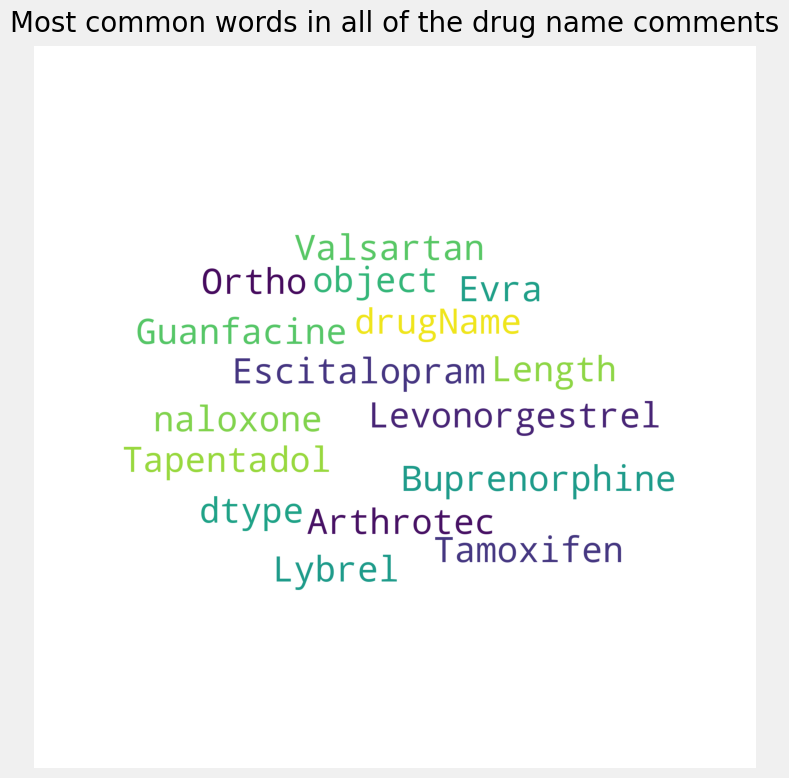

In [ ]:
comments_text = str(drugs_df["drugName"])
comments_mask = np.array(Image.open(d + 'comment.png'))
plot_wordcloud(comments_text, comments_mask, max_words=20, max_font_size=100,
               title='Most common words in all of the drug name comments', title_size=20)

> * <b>From top 50 Drug Names Barchart</b>, can be seen <b>top 10 Drug Names are "Levonorgestrel", "Etonorgestrel", "Ethinnyl Estradiol / Norethindrone", "Nexplanon", "Ethinnyl Estradiol / Norgestimate", "Ethinnyl Estradiol / Levonorgestrel", "Phentermine", "Sertraline, "Escitalopram" and "Mirena"</b>.

### <b>Check Most Drugs Available per Condition</b>

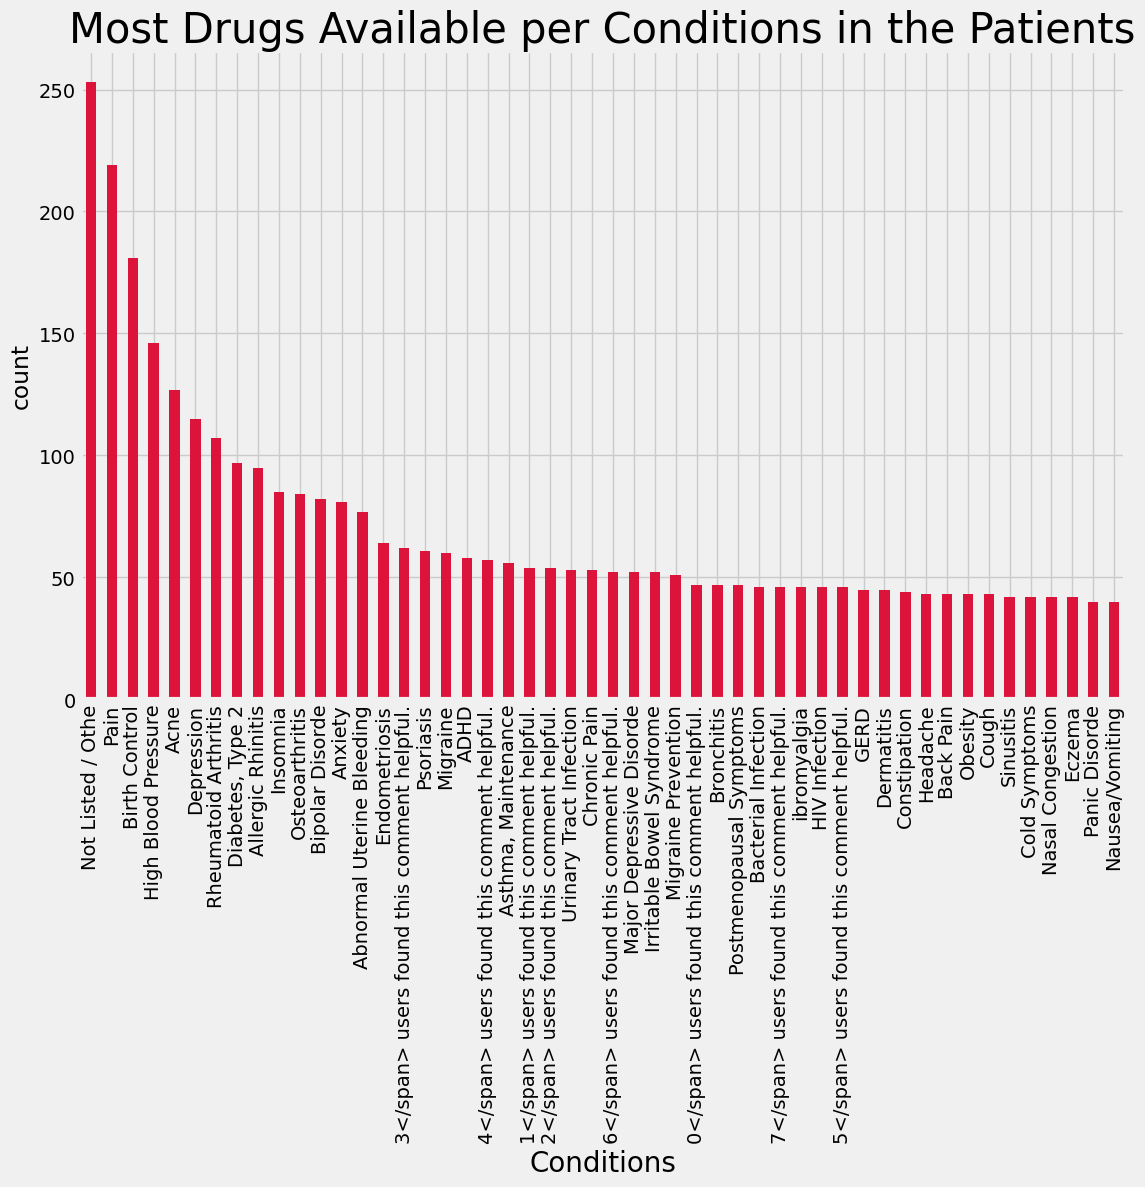

In [ ]:
drugs_df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False).head(50).plot.bar(figsize=(12, 8), color='crimson')
plt.title('Most Drugs Available per Conditions in the Patients', fontsize=30)
plt.xlabel('Conditions', fontsize=20)
plt.ylabel('count')
plt.show()

> * From <b>top 10 Most Drugs Available per Condition</b>, there are <b>quite variety of drugs</b> can be <b>used for "Pain", "Birth Control", "High Blood Pressure, "Acne", "Depression", "Rheumathoid Arthritis", "Diabetes Type 2", "Allergic Rhinitis", "Osthoarthritis" and "Bipolar Disorder"</b>.

### <b>Check Most Drug Available to be Used for Many Conditions</b>

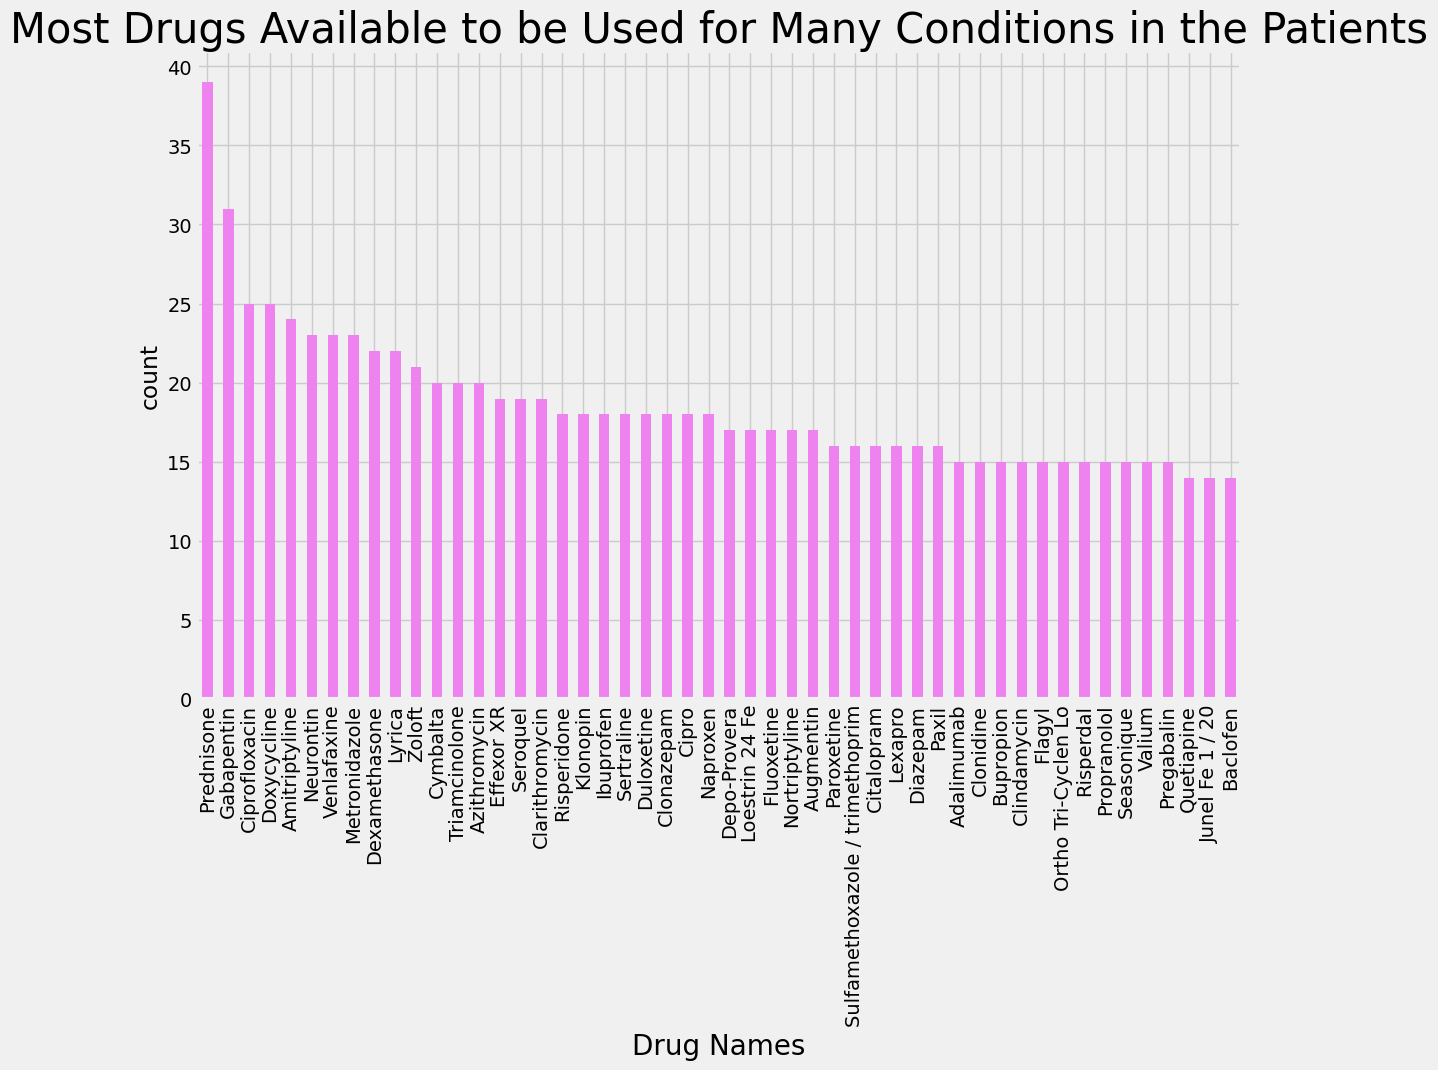

In [ ]:
drugs_df.groupby(['drugName'])['condition'].nunique().sort_values(ascending=False).head(50).plot.bar(figsize=(12, 8), color='violet')
plt.title('Most Drugs Available to be Used for Many Conditions in the Patients', fontsize=30)
plt.xlabel('Drug Names', fontsize=20)
plt.ylabel('count')
plt.show()

> * From <b>top 10 Most Drug Available to be Used for Many Conditions</b>, the top 10 drugs can be used on different medical conditions are <b> "Prednisone", "Gabapentin", "Ciprofloxacin", "Doxycycline", "Amytriptyline", "Metronidazole", "Venlafaxine", "Neurontin", "Dexamethasone" and "Lyrica"</b>.

### <b>Check Most Common Reviews</b>

In [ ]:
# Checking whether Length of Review has any Impact on Ratings of the Drugs
#   - for that we need to create a new column to calculate length of the reviews
drugs_df['len'] = drugs_df['review'].apply(len)

In [ ]:
# Lets check the Impact of Length of Reviews on Ratings
drugs_df[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.386507   3692
2        9  454.400000  10787
3        8  458.146020   5112
4        5  465.044521   3030
5        6  478.465728   2048
6        4  469.004491   2202
7        6  484.838129   3063
8        3  482.325441   4087
9        3  477.165931   6182
10       3  443.484009   6192

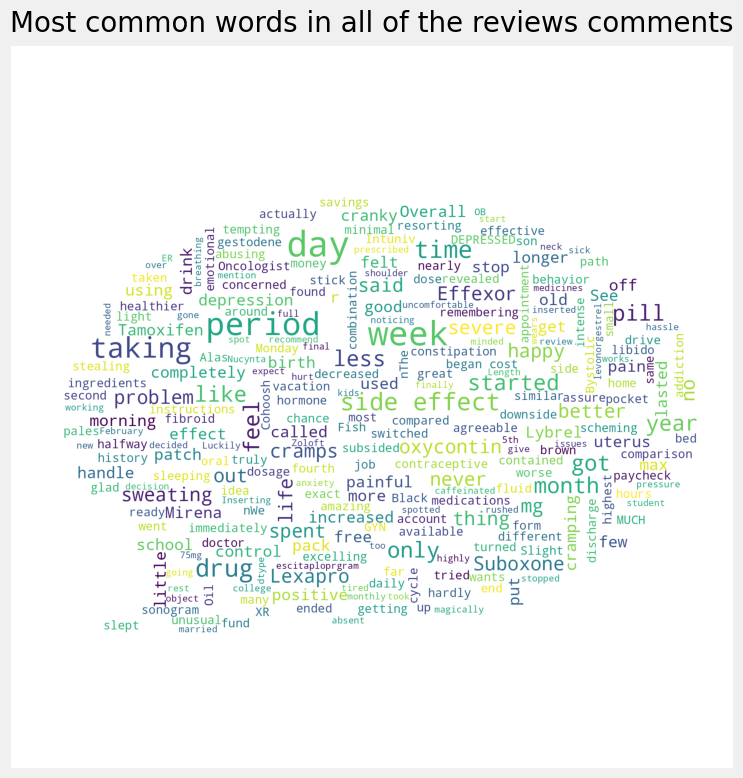

In [ ]:
comments_text = str(drugs_df["review"])
comments_mask = np.array(Image.open(d + 'comment.png'))
plot_wordcloud(comments_text, comments_mask, max_words=1000, max_font_size=100,
               title='Most common words in all of the reviews comments', title_size=20)

> * <b>For all the ratings</b>, the <b>average length of the review is similar</b>, which means there is no clear pattern.
> * <b>For the maximum length of the reviews</b>, the <b>pattern</b> is <b>highly unclear and wild</b>, which means that <b>the length of reviews has no impact on the ratings of the drugs</b> considering the overall scenario.
> * The <b>rating 2</b>, the <b>maximum length for the review</b> is <b>around 10000 words long</b>.
> * From <b>the most common words displayed in wordclouds</b>, it <b>can be seen the most common words in the review are period, week, day, taking, side effect, pill, etc</b> which <b>have no any clear indications of any words from reviews having greatly impacts on the rating of drugs considering the overall scenario</b>.
> * Therefore, will <b>look into Ngrams to obtain clear combination of reviews' effects</b> that <b>form meaningful context</b> for <b>positive and negative sentiment</b> and <b>models' text learning</b>.

In [ ]:
# Lets check the Highest Length Review
print("Length of Longest Review", drugs_df['len'].max())
drugs_df['review'][drugs_df['len']==drugs_df['len'].max()].iloc[0]

Length of Longest Review 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

> * It's <b>humongous going through the review</b>, as <b>can notice</b>, that <b>the reviews contain some unnecessary things</b>, so <b>need to clean the reviews</b>.

# <b>Data Wrangling & Feature Engineering</b>

### <b>Cleaning the Reviews</b>

> ##### Drop null values

In [ ]:
drugs_df.shape

(215063, 8)

In [ ]:
drugs_df.dropna(inplace=True)

In [ ]:
drugs_df.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
len            0
dtype: int64

In [ ]:
drugs_df.shape

(213869, 8)

In [ ]:
drugs_df['cleaned_review'] = " "
drugs_df = drugs_df.reset_index()
drugs_df = drugs_df.drop(columns=['index'])

In [ ]:
# Flatten the DataFrame column 'review' before splitting into batches
all_reviews = [review for review in drugs_df['review']]

# Split the DataFrame into batches
batches = [all_reviews[i:i + batch_size] for i in range(0, len(all_reviews), batch_size)]

# Create a pool of processes
with multiprocessing.Pool(processes=num_processes) as pool:
  # Process batches in parallel
  results = list(tqdm(pool.imap(preprocess_batch, batches), total=len(batches)))

# Flatten the results and update the DataFrame
processed_texts = [item for sublist in results for item in sublist]
drugs_df['cleaned_review'] = processed_texts

  0%|          | 0/214 [00:00<?, ?it/s]

###  <b>Clean Medical Conditions Columns Containing Redundant Information</b>

> ##### Clean, Drop NA and Wrangle Unneccessary Information for 'condition' Column

In [ ]:
drugs_df = drugs_df[~drugs_df['condition'].str.contains('</span>|min/|^.{1,2}$|nan')]
drugs_df.shape

(211060, 9)

### <b>Remove Any Person Name, Location Name, Organization Name, Date & Time, Money, etc by NER</b>

In [ ]:
# Split the DataFrame into batches
batches = [drugs_df['cleaned_review'].iloc[i: i+batch_size].tolist() for i in range(0, len(drugs_df), batch_size)]

# Create a pool of processes
with multiprocessing.Pool(processes=num_processes) as pool:
  # Process batches in parallel
  results = list(tqdm(pool.imap(remove_entities_batch_parallel, batches), total=len(batches)))

# Flatten the results and update the DataFrame
processed_texts = [item for sublist in results for item in sublist]
drugs_df['cleaned_review'] = processed_texts

  0%|          | 0/212 [00:00<?, ?it/s]

In [ ]:
drugs_df['cleaned_review'][1]

'son halfway  intuniv concerned began week started taking highest dose  hardly get out bed cranky slept  drive home school vacation unusual called doctor  said stick out few  see school getting up   problem free much more agreeable le emotional good thing le cranky remembering thing overall behavior better tried many different medication far most effective'

In [ ]:
# Replace more than 1 space and replace as 1 space in the string of each rows
drugs_df['cleaned_review'] = drugs_df['cleaned_review'].str.replace(r'\s{2,}', ' ')

In [ ]:
drugs_df['cleaned_review'].str.contains(r'\s{2,}', regex=True)

0         False
1         False
2         False
3         False
4         False
          ...  
213864    False
213865    False
213866    False
213867    False
213868    False
Name: cleaned_review, Length: 211060, dtype: bool

In [ ]:
drugs_df.shape

(211060, 9)

In [ ]:
drugs_df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,cleaned_review
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27,79,no side effect combination bystolic mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192,741,son halfway intuniv concerned began week started taking highest dose hardly get out bed cranky slept drive home school vacation unusual called doctor said stick out few see school getting up problem free much more agreeable le emotional good thing le cranky remembering thing overall behavior better tried many different medication far most effective
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17,755,used oral contraceptive pill cycle happy light period max day no side effect contained hormone gestodene available switched lybrel ingredient similar pill ended started lybrel immediately day period instruction said period lasted taking pack same pack thing got worse period lasted end brown discharge positive side side effect idea period free tempting ala


### <b>Check Reviews by NGrams</b>

In [ ]:
drugs_df_1_5 = drugs_df[drugs_df["rating"]<6]
drugs_df_6_10 = drugs_df[drugs_df["rating"]>=6]

In [ ]:
drugs_df_1_5.shape

(63113, 9)

In [ ]:
drugs_df_6_10.shape

(147947, 9)

In [ ]:
# Get the bar chart from rating 1 to 5 review ##
freq_dict = defaultdict(int)
for sent in drugs_df_1_5["cleaned_review"]:
  for word in generate_ngrams(sent):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Get the bar chart from rating 6 to 10 review ##
freq_dict = defaultdict(int)
for sent in drugs_df_6_10["cleaned_review"]:
  for word in generate_ngrams(sent):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5",
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

> * When you <b>use 1-gram</b>, can see that <b>the top 10 words have the same contents</b>, although <b>the order of left (negative) and right (positive) are different</b>.
> * This means when we <b>analyze the text with a single corpus</b>, it <b>does not classify the emotion well</b>. So, we <b>will expand the corpus</b>.

In [ ]:
# Get the bar chart from rating 1 to 5 review ##
freq_dict = defaultdict(int)
for sent in drugs_df_1_5["cleaned_review"]:
  for word in generate_ngrams(sent, 2):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Get the bar chart from rating 6 to 10 review ##
freq_dict = defaultdict(int)
for sent in drugs_df_6_10["cleaned_review"]:
  for word in generate_ngrams(sent, 2):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5",
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

> * Likewise, <b>in 2-gram</b>, the <b>contents of the top 5 corpus are similar</b>, and it is <b>hard to classify positive and negative</b>.
> * However, can see that <b>this is better to classify emotions rather than previous 1-grams, like side effects, birth control, mood swing, sex drive and weight gain in both positive and negative bi-grams</b>.

In [ ]:
# Get the bar chart from rating 1 to 5 review ##
freq_dict = defaultdict(int)
for sent in drugs_df_1_5["cleaned_review"]:
  for word in generate_ngrams(sent, 3):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Get the bar chart from rating 6 to 10 review ##
freq_dict = defaultdict(int)
for sent in drugs_df_6_10["cleaned_review"]:
  for word in generate_ngrams(sent, 3):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5",
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

> * From <b>3-gram</b>, can see that there is <b>a no clear difference between positive and negative corpus</b>.

In [ ]:
# Get the bar chart from rating 1 to 5 review ##
freq_dict = defaultdict(int)
for sent in drugs_df_1_5["cleaned_review"]:
  for word in generate_ngrams(sent, 4):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Get the bar chart from rating 6 to 10 review ##
freq_dict = defaultdict(int)
for sent in drugs_df_6_10["cleaned_review"]:
  for word in generate_ngrams(sent, 4):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5",
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

> * Clearly, <b>4-gram classifies emotions much better than other grams</b>. Therefore, we <b>will use quar-gram to build deep learning model including bi-grams</b>.

### <b>Create Target Feature, Sentiments</b>

In [ ]:
drugs_df['sentiments'] = np.where(drugs_df['rating']<6, 0, 1)

In [ ]:
drugs_df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,cleaned_review,sentiments
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27,79,no side effect combination bystolic mg fish oil,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192,741,son halfway intuniv concerned began week started taking highest dose hardly get out bed cranky slept drive home school vacation unusual called doctor said stick out few see school getting up problem free much more agreeable le emotional good thing le cranky remembering thing overall behavior better tried many different medication far most effective,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17,755,used oral contraceptive pill cycle happy light period max day no side effect contained hormone gestodene available switched lybrel ingredient similar pill ended started lybrel immediately day period instruction said period lasted taking pack same pack thing got worse period lasted end brown discharge positive side side effect idea period free tempting ala,0


In [ ]:
list(drugs_df['sentiments'].value_counts())

[147947, 63113]

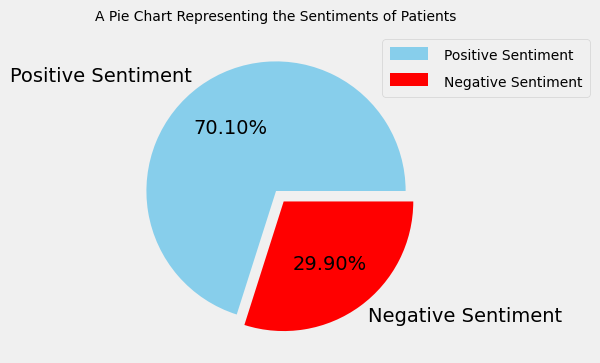

In [ ]:
# a pie chart to represent the sentiments of the patients
colors = ['skyblue', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (6, 4)
plt.pie(list(drugs_df['sentiments'].value_counts()), colors=colors, labels=labels, explode=explode, autopct='%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize=10)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
legend.get_texts()[0].set_fontsize(10)  # Adjust the font size for the first legend item
legend.get_texts()[1].set_fontsize(10)  # Adjust the font size for the second legend item
plt.show()

> * The <b>positive reviews are 70% of the data</b>. This is <b>imbalanced data</b>.

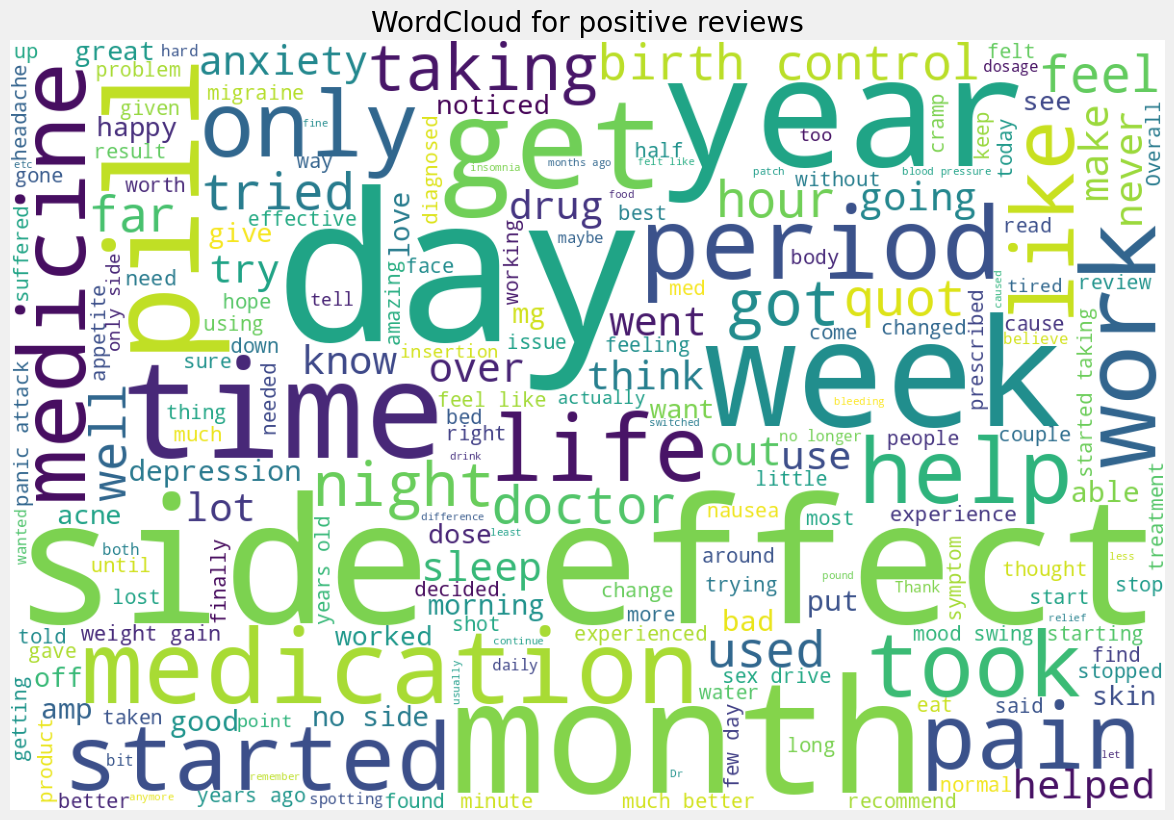

In [ ]:
# Word cloud for positive reviews
positive_reviews = " ".join([review for review in drugs_df['review'][drugs_df['sentiments'] == 1]])
wordcloud = WordCloud(width=1200, height=800, background_color='white', stopwords=advance_stopwords(), min_font_size=10).generate(positive_reviews)

# Plot the WordCloud image
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud)
plt.title('WordCloud for positive reviews')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

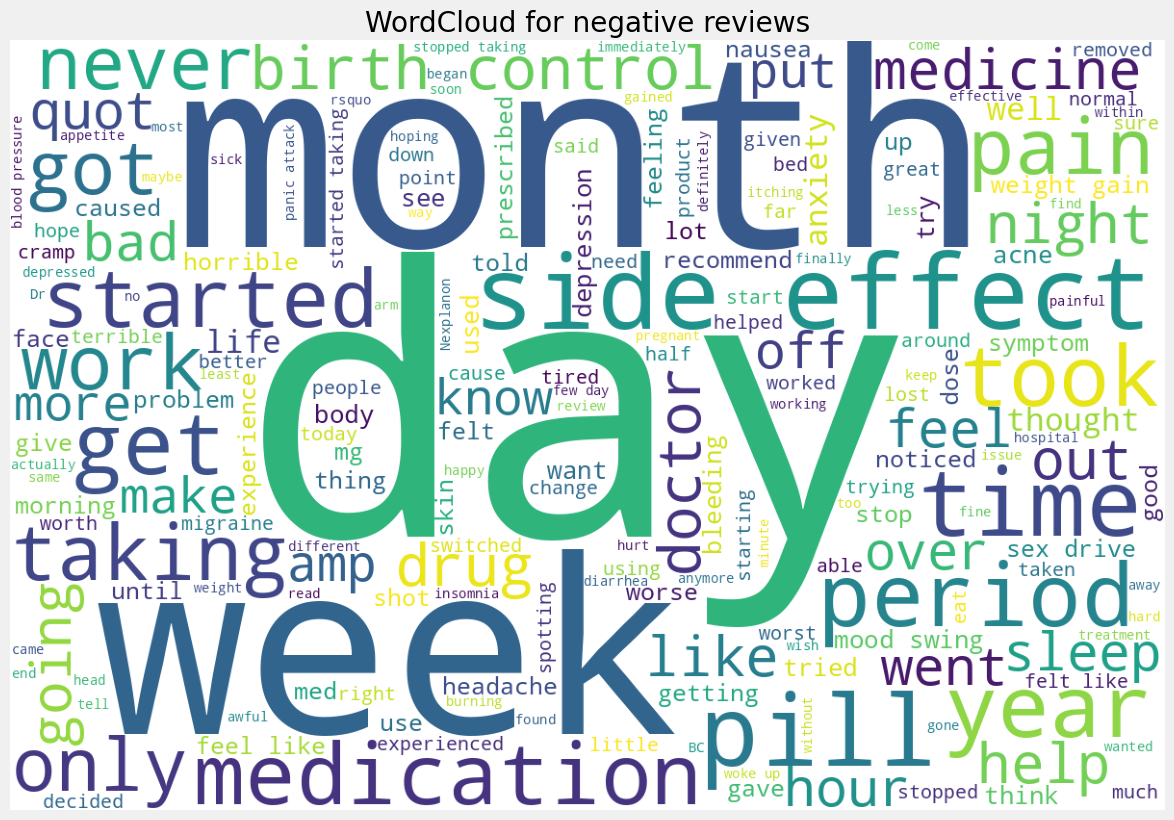

In [ ]:
# Word cloud for negative reviews
positive_reviews = " ".join([review for review in drugs_df['review'][drugs_df['sentiments'] == 0]])
wordcloud = WordCloud(width=1200, height=800,background_color='white', stopwords=advance_stopwords(), min_font_size=10).generate(positive_reviews)

# Plot the WordCloud image
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud)
plt.title('WordCloud for negative reviews')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

> * In the wordclouds, we can <b>observe the frequent words</b> are <b>almost common in both the positive and negative reviews</b>. We <b>can see most frequent word is 'side effect', 'period', 'medication', 'pill', 'day', 'month', 'week' and 'year'</b>.
> Based on above two wordclouds, there <b>can be a boundary case like</b>
>> * in <b>positive reviews</b>, there can be <b>'no side effects'</b> or <b>'good effect'</b>, etc.
>> * in <b>negative reviews</b>, there can be only <b>'side effects'</b> or <b>'severe side effects'</b>, etc.

### <b>Remove DataFrame Rows where The Medical Conditions has Only 1 Drug</b>

In [ ]:
unique_conditions_df = pd.DataFrame(list(drugs_df['condition'].unique()), columns=["Unique Conditions"])
unique_conditions_df

,Unique Conditions
0,Left Ventricular Dysfunction
1,ADHD
2,Birth Control
3,Opiate Dependence
4,Benign Prostatic Hyperplasia
...,...
816,Renal Tubular Acidosis
817,Yellow Fever Prophylaxis
818,Acute Otitis Externa
819,Steroid Responsive Inflammatory Conditions


In [ ]:
# Count the unique drug names within each condition group
unique_drug_counts = drugs_df.groupby('condition')['drugName'].transform('nunique')
unique_drug_counts_df = pd.DataFrame(list(unique_drug_counts), columns=["Unique Drugs Count"])
unique_drug_counts_df

,Unique Drugs Count
0,9
1,58
2,181
3,181
4,9
...,...
211055,3
211056,81
211057,181
211058,219


In [ ]:
len(unique_condition_drugs[unique_condition_drugs['Unique Drugs Count'] == 1])

633

In [ ]:
# Before remove unique condition's only 1 drug, dataset dimension
drugs_df.shape

(211060, 10)

In [ ]:
# Filter rows where the unique drug count is equal to 1
drugs_df = drugs_df[unique_drug_counts != 1]

# After remove unique condition's only 1 drug, dataset dimension
drugs_df.shape

(210427, 10)

### <b>Calculating Effectiveness and Usefulness of Drugs</b>

In [ ]:
# Lets Calculate an Effective Rating
min_rating = drugs_df['rating'].min()
max_rating = drugs_df['rating'].max()

drugs_df['eff_score'] = drugs_df['rating'].apply(scale_rating)

In [ ]:
# Lets also calculate Usefulness Score
drugs_df['usefulness'] = drugs_df['rating']*drugs_df['usefulCount']*drugs_df['eff_score']

# Lets check the Top 10 Most Useful Drugs with their Respective Conditions
drugs_df[['drugName','condition','usefulness']][drugs_df['usefulness'] >
        drugs_df['usefulness'].mean()].sort_values(by='usefulness', ascending=False).head(10).reset_index(drop=True)

,drugName,condition,usefulness
0,Sertraline,Depression,12910
1,Zoloft,Depression,12910
2,Mirena,Birth Control,12470
3,Levonorgestrel,Birth Control,12470
4,Sertraline,Depression,8541
5,Zoloft,Depression,8541
6,Phentermine,Weight Loss,7960
7,Adipex-P,Weight Loss,7960
8,Etonogestrel,Birth Control,7300
9,Implanon,Birth Control,7300


> * <b>Most of the useful drugs</b> belong to the <b>depression</b>, <b>birth control</b> and <b>weight loss</b> medical conditions,
>> * <b>might cross-check whether the list of drugs are really useful or not</b>
>> * <b>by checking the Google reviews</b> or <b>by taking the doctor's recommendation</b>.

### <b>Remove Unneccesary Columns</b>

In [ ]:
# The Length of the review, original reviews
# and sentiments(which is created earlier by assumption for good[rating >= 6] and bad [rating < 6] since it can be used the normalized sentiment, eff_score)
  # - are not related to Ratings, will drop the original reviews and length columns
# Lets remove the unique Id, date, review, len, and sentiment column also
drugs_df = drugs_df.drop(['uniqueID', 'review', 'date', 'len', 'sentiments'], axis=1)

# Lets check the name of columns now
drugs_df.columns

Index(['drugName', 'condition', 'rating', 'usefulCount', 'cleaned_review',
       'eff_score', 'usefulness'],
      dtype='object')

# <b>Analyzing Most Useful Drugs based on Conditions using 'Python @interact' Interface</b>

In [ ]:
# Lets calculate the Number of Useless and Useful Drugs for Each Condition
@interact
def check(condition=list(drugs_df['condition'].value_counts().index)):
  return drugs_df[drugs_df['condition']==condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

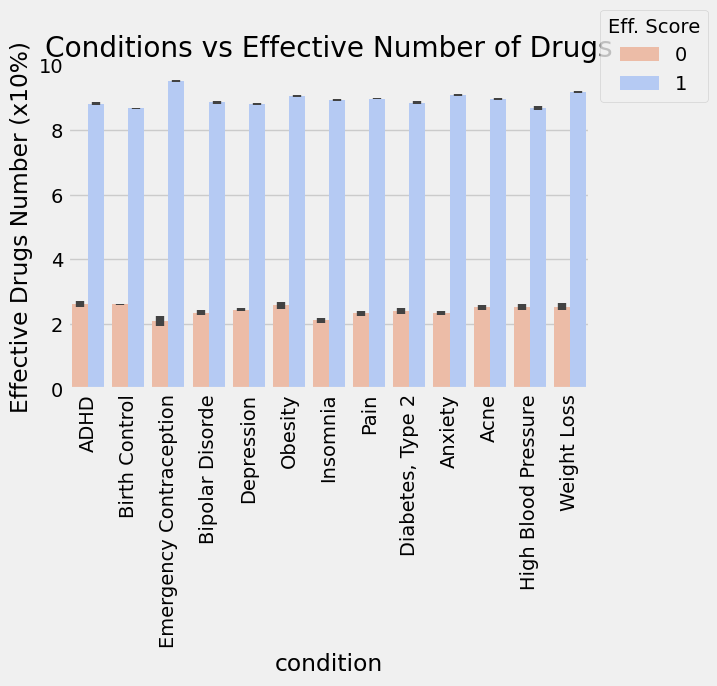

In [ ]:
# Cannot plot all the conditions as there are more than 800 medical conditions,
     # so only going to plot the popular medical conditions
     # like birth control, depression being anxiety, acne, bipolar disorder, insomnia, weight loss,
     # obesity, ADHD, diabetes, type two emergency contraception, high blood pressure, migraine.
# Lets check this in Graph,
popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure','Migrane')
conditions = drugs_df.loc[drugs_df['condition'].isin(popular_conditions)]

# Use the 'ax' parameter to access the Axes object and set the legend position
ax = sns.barplot(x=conditions['condition'], y=conditions['rating'], hue=drugs_df['eff_score'], \
                 palette='coolwarm_r')
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1.2))
legend.set_title('Eff. Score')

plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation=90)
plt.ylabel('Medical Conditions')
plt.ylabel('Effective Drugs Number (x10%)')
plt.show()

> * <b>The ratio of useful and useless drugs</b> for <b>all of these medical conditions</b> is <b>very similar</b>.
> * Hence can conclude that <b>around 30 percent of the drugs in each of the medical conditions will be useless</b>.

In [ ]:
# Lets check Drugs, which were useful to Highest Number of Poeple
drugs_df[['drugName','usefulCount']][drugs_df['usefulCount'] >
        drugs_df['usefulCount'].mean()].sort_values(by='usefulCount',
        ascending=False).head(10).reset_index(drop=True)

,drugName,usefulCount
0,Sertraline,1291
1,Zoloft,1291
2,Mirena,1247
3,Levonorgestrel,1247
4,Zoloft,949
5,Sertraline,949
6,Adipex-P,796
7,Phentermine,796
8,Citalopram,771
9,Celexa,771


### <b>Finding Most Useful and Useless Drugs for each Condition</b>

In [ ]:
drugs_df.shape

(210427, 7)

In [ ]:
# Lets remove all the Duplicates from the Dataset
drugs_df = drugs_df.drop_duplicates()
drugs_df.shape

(210424, 7)

In [ ]:
# Lets find the Highest and Lowest Rated Drugs for each Condition
@interact
def high_low_rate(condition=list(drugs_df['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(drugs_df[drugs_df['condition']==condition][['drugName','usefulness']].sort_values(by='usefulness',
          ascending=False).head().reset_index(drop=True))
    print("\n\n Bottom 5 Drugs")
    print(drugs_df[drugs_df['condition']==condition][['drugName','usefulness']].sort_values(by='usefulness',
          ascending=True).head().reset_index(drop=True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

# <b>Analyzing Most Useful Drugs based on Conditions using Machine Learning Models</b>

In [ ]:
drugs_df.head(3)

,drugName,condition,rating,usefulCount,cleaned_review,eff_score,usefulness
0,Valsartan,Left Ventricular Dysfunction,9,27,no side effect combination bystolic mg fish oil,1,243
1,Guanfacine,ADHD,8,192,son halfway intuniv concerned began week started taking highest dose hardly get out bed cranky slept drive home school vacation unusual called doctor said stick out few see school getting up problem free much more agreeable le emotional good thing le cranky remembering thing overall behavior better tried many different medication far most effective,1,1536
2,Lybrel,Birth Control,5,17,used oral contraceptive pill cycle happy light period max day no side effect contained hormone gestodene available switched lybrel ingredient similar pill ended started lybrel immediately day period instruction said period lasted taking pack same pack thing got worse period lasted end brown discharge positive side side effect idea period free tempting ala,0,0


In [ ]:
drugs_df.shape

(210424, 7)

### <b>Select Top 10 Most Available Drugs for Each Medical Conditions & Top 10 Most Common Medical Condition</b>

In [ ]:
# List of conditions you want to keep
desired_conditions = ["Birth Control", "Depression", "Weight Loss", "Diabetes, Type 2", "High Blood Pressure", "Pain", "Acne", "Rheumathoid Arthritis", "Insomnia", "Obesity"]
# Filter the DataFrame based on the desired conditions
drugs_df = drugs_df[drugs_df['condition'].isin(desired_conditions)]

In [ ]:
drugs_df.shape

(87263, 7)

In [ ]:
drugs_df.head(3)

,drugName,condition,rating,usefulCount,cleaned_review,eff_score,usefulness
2,Lybrel,Birth Control,5,17,used oral contraceptive pill cycle happy light period max day no side effect contained hormone gestodene available switched lybrel ingredient similar pill ended started lybrel immediately day period instruction said period lasted taking pack same pack thing got worse period lasted end brown discharge positive side side effect idea period free tempting ala,0,0
3,Ortho Evra,Birth Control,8,10,time using form birth control glad went patch decreased libido subsided only downside period longer day exact used only period day cramp intense day period never cramp using birth control happy patch,1,80
9,Ethinyl estradiol / levonorgestrel,Birth Control,8,1,pill many year doctor changed rx chateal effective help completely clearing acne take gain extra weight develop emotional health issue stopped taking bc started using more natural method birth control started bc hate acne came age hope symptom like depression weight gain begin affect older naturally moody worsen thing negative mental rut hope push over edge believe depressed hopefully like younger,1,8


### <b>Feature X and Target y Variables Creation</b>

In [ ]:
X_drugs_df = drugs_df['cleaned_review']
y_drugs_df = drugs_df['condition']

In [ ]:
# Convert string labels to numerical values
label_encoder = LabelEncoder()
y_drugs_df_encoded = label_encoder.fit_transform(y_drugs_df)

### <b>80-20 Data Split</b>

In [ ]:
# Split the data
X_drugs_df_train, X_drugs_df_test, y_drugs_df_train, y_drugs_df_test = train_test_split(X_drugs_df, y_drugs_df_encoded, stratify=y_drugs_df_encoded, test_size=0.2, random_state=42)

# Checking the Train and Test DataFrame Shape
print("Shape of X_drugs_df_train:", X_drugs_df_train.shape)
print("Shape of X_drugs_df_test: ", X_drugs_df_test.shape)
print("Shape of y_drugs_df_train:", y_drugs_df_train.shape)
print("Shape of y_drugs_df_test: ", y_drugs_df_test.shape)

Shape of X_drugs_df_train: (69810,)
Shape of X_drugs_df_test:  (17453,)
Shape of y_drugs_df_train: (69810,)
Shape of y_drugs_df_test:  (17453,)


### <b>TF-IDF Vectorization for Traditional Machine Learning</b>

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(2,4))
tfidf_X_drugs_df_train = tfidf_vectorizer.fit_transform(X_drugs_df_train)
tfidf_X_drugs_df_test = tfidf_vectorizer.transform(X_drugs_df_test)

### <b>Models Cross-Checking, Training and Evaluation</b>

In [ ]:
svc = LinearSVC()
svc.fit(tfidf_X_drugs_df_train, y_drugs_df_train)

svc_pred = svc.predict(tfidf_X_drugs_df_test)

# Calculate accuracy
svc_score = accuracy_score(y_drugs_df_test, svc_pred)

In [ ]:
mnb = MultinomialNB()
mnb.fit(tfidf_X_drugs_df_train, y_drugs_df_train)

mnb_pred = mnb.predict(tfidf_X_drugs_df_test)

# Calculate accuracy
mnb_score = accuracy_score(y_drugs_df_test, mnb_pred)

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(tfidf_X_drugs_df_train, y_drugs_df_train)

lgbm_pred = lgbm.predict(tfidf_X_drugs_df_test)

# Calculate accuracy
lgbm_score = accuracy_score(y_drugs_df_test, lgbm_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.623789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347148
[LightGBM] [Info] Number of data points in the train set: 69810, number of used features: 18856
[LightGBM] [Info] Start training from score -2.462722
[LightGBM] [Info] Start training from score -0.819920
[LightGBM] [Info] Start training from score -1.970461
[LightGBM] [Info] Start training from score -3.256236
[LightGBM] [Info] Start training from score -3.336310
[LightGBM] [Info] Start training from score -2.878921
[LightGBM] [Info] Start training from score -2.909198
[LightGBM] [Info] Start training from score -2.359465
[LightGBM] [Info] Start training from score -2.888654


In [ ]:
pa = PassiveAggressiveClassifier()
pa.fit(tfidf_X_drugs_df_train, y_drugs_df_train)

pa_pred = pa.predict(tfidf_X_drugs_df_test)

# Calculate accuracy
pa_score = accuracy_score(y_drugs_df_test, pa_pred)

In [ ]:
models_df = pd.DataFrame([svc, mnb, lgbm, pa])
scores_df = pd.DataFrame([svc_score, mnb_score, lgbm_score, pa_score])
models_score_comparison = (pd.concat([models_df, scores_df], axis=1))
models_score_comparison.columns = ["Models", "Score"]
models_score_comparison

,Models,Score
0,LinearSVC(),0.936114
1,MultinomialNB(),0.618461
2,LGBMClassifier(),0.838022
3,PassiveAggressiveClassifier(),0.939151


> * The <v>best model</b> is <b>Passive Aggressive Classifier</b> with <b>93.91% accuracy</b>.

In [ ]:
max(models_score_comparison['Score'])

0.9391508623159343

In [ ]:
best_model = models_score_comparison[models_score_comparison['Score']==max(models_score_comparison['Score'])]['Models'].values[0]
best_model

PassiveAggressiveClassifier()

### <b>Verify Most Informative Features Reviews for 3 Medical Conditions (Birth Control, Depression & Weight Loss)</b>

In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, best_model, 'Birth Control', label_encoder)

Birth Control taken out 5.839587221157088
Birth Control taking pill 6.022057356144003
Birth Control heavy period 6.623452704317773
Birth Control getting pregnant 6.924098339545283
Birth Control get period 7.306298260766119
Birth Control no period 7.814819949758737
Birth Control get pregnant 7.860392008852699
Birth Control sex drive 11.219472785265713
Birth Control mood swing 13.59464872272142
Birth Control birth control 19.707756184764012


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, best_model, 'Depression', label_encoder)

Depression help depression 5.129323795394881
Depression helped depression 5.2144829822716545
Depression wellbutrin xl 5.234432457493438
Depression effexor xr 5.347140015828348
Depression brain zap 5.491547111284647
Depression major depression 5.539816151665612
Depression saved life 5.721840801644151
Depression anxiety depression 6.01934495999701
Depression suicidal thought 6.117140070257821
Depression depression anxiety 8.361895123644379


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, best_model, 'Weight Loss', label_encoder)

Weight Loss taking belviq 3.131745954530522
Weight Loss started taking phentermine 3.1469461012553572
Weight Loss taking adipex 3.231808719342737
Weight Loss phentermine lost 3.2847056971063178
Weight Loss started adipex 3.453242879384706
Weight Loss weight loss 3.6178922795345447
Weight Loss down lb 3.803872294568926
Weight Loss down pound 4.03448915850537
Weight Loss started phentermine 4.495679018408429
Weight Loss taking phentermine 6.20442409957594


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, best_model, "Diabetes, Type 2", label_encoder)

Diabetes, Type 2 sugar down 3.058942618653151
Diabetes, Type 2 injection site 3.552911912882803
Diabetes, Type 2 metformin mg 3.717062191480229
Diabetes, Type 2 glucose level 3.9726365823502996
Diabetes, Type 2 yeast infection 4.073493715560285
Diabetes, Type 2 type diabetes 4.262188431001494
Diabetes, Type 2 blood glucose 4.449559480362361
Diabetes, Type 2 mg metformin 5.189501328705572
Diabetes, Type 2 sugar level 8.766283469313844
Diabetes, Type 2 blood sugar 14.017498844230728


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, best_model, "High Blood Pressure", label_encoder)

High Blood Pressure bystolic mg 2.4897534687693996
High Blood Pressure bp down 2.5367928005541063
High Blood Pressure taking lisinopril 2.8076364155561655
High Blood Pressure leg cramp 3.0336133663397318
High Blood Pressure lower bp 3.314810974904717
High Blood Pressure high bp 3.494440377014881
High Blood Pressure heart rate 3.511531476311863
High Blood Pressure beta blocker 3.705724540513697
High Blood Pressure dry cough 4.765721712778381
High Blood Pressure blood pressure 15.545957350579823


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, best_model, "Pain", label_encoder)

Pain nerve pain 6.302622000101838
Pain pain management 6.346481760728509
Pain help pain 6.4652566574539385
Pain breakthrough pain 6.782078217405598
Pain pain free 6.794672028986523
Pain pain medication 6.851612052367229
Pain severe pain 6.8834433628868865
Pain pain medicine 7.649485180695978
Pain chronic pain 9.632064370334664
Pain pain relief 11.207198367706338


> * As per the output above, the <b>bi-gram features seem relevant based on the medical condition “Birth Control”, “Depression”, “Weight Loss”, “Diabetes Type 2”, “High Blood Pressure” & “Pain”</b>.
> * The <b>extracted keywords from reviews</b>, <b>bring meaningful context to each medical condition</b>.

In [ ]:
# sample sentences for recommending drugs
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
  "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
  "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]

In [ ]:
tfidf_sent = tfidf_vectorizer.transform(sentences)
predictions = best_model.predict(tfidf_sent)

In [ ]:
# Assuming predictions is an array like [3, 4, 7]
predictions_labels = label_encoder.inverse_transform(predictions)
predictions_labels

array(['High Blood Pressure', 'Depression', 'Pain'], dtype=object)

In [ ]:
for text, label in zip(sentences, predictions_labels):
  top_drugs = top_drugs_extractor(drugs_df, label)
  print("text:", text, "\nCondition:", label)
  print("Top 5 Suggested Drugs:")
  print(top_drugs[0])
  print(top_drugs[1])
  print(top_drugs[2])
  print(top_drugs[3])
  print(top_drugs[4])
  print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 5 Suggested Drugs:
Losartan
Aldactone
Spironolactone
Amlodipine
Amlodipine

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 5 Suggested Drugs:
Sertraline
Zoloft
Viibryd
Vilazodone
Zoloft

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down